In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
df = df.drop(df[df['review'].isnull()].index)

In [7]:
len(df[df['review'].str.isspace()])

27

In [8]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [9]:
df = df.drop(df[df['review'].str.isspace()].index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [11]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
pos = df[df['label']=='pos']['review']
neg = df[df['label']=='neg']['review']

In [14]:
cv = CountVectorizer(stop_words='english')
matrix = cv.fit_transform(pos)
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [30]:
cv = CountVectorizer(stop_words='english')
matrix = cv.fit_transform(neg)
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [15]:
X = df['review']
y = df['label']
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(stop_words='english')

In [19]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [21]:
nb = MultinomialNB()
svc = LinearSVC()

In [22]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [23]:
def report(model):
    model.fit(X_train_tfidf,y_train)
    preds = model.predict(X_test_tfidf)
    print(classification_report(preds, y_test))
    print(plot_confusion_matrix(model,X_test_tfidf,y_test))

              precision    recall  f1-score   support

         neg       0.87      0.78      0.82       214
         pos       0.76      0.86      0.80       174

    accuracy                           0.81       388
   macro avg       0.81      0.82      0.81       388
weighted avg       0.82      0.81      0.81       388



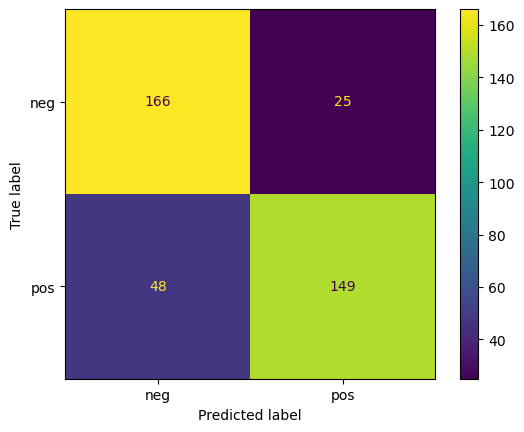

In [24]:
report(nb)

              precision    recall  f1-score   support

         neg       0.84      0.81      0.82       197
         pos       0.81      0.84      0.82       191

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



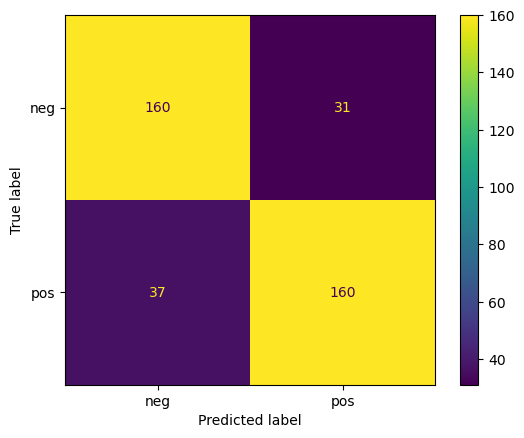

In [25]:
report(svc)

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [28]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

              precision    recall  f1-score   support

         neg       0.84      0.81      0.82       197
         pos       0.81      0.84      0.82       191

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



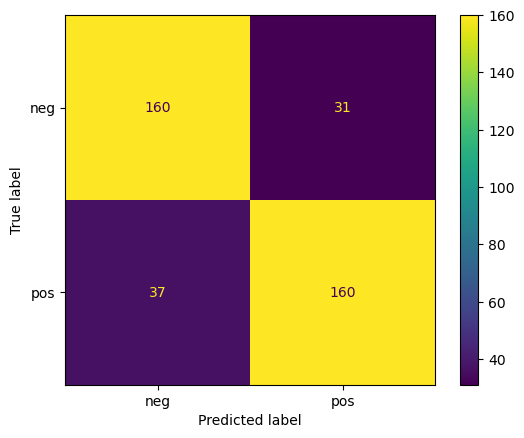

In [29]:
report(svc)

## Great job!